# Create Network Dataset

How to create network **Dataset**. 
**Add some description here**

In [1]:
import ast, os
import pandas as pd
import networkx as nx

from pyincore import IncoreClient, DataService, Dataset, NetworkDataset, NetworkUtil

In [2]:
client = IncoreClient()
datasvc = DataService(client)

Connection successful to IN-CORE services. pyIncore version detected: 1.12.0


### Create Graph file in CSV using local Link shapefile

In [3]:
# get link dataset from data service
centerville_epn_link = '5b1fdc2db1cf3e336d7cecc9'
node_dataset = Dataset.from_data_service(centerville_epn_link, DataService(client))
df = node_dataset.get_dataframe_from_shapefile()

# get the field name from the node dataset dataframe
id_fldname = 'linknwid'
fromnode_fldname = 'fromnode'
tonode_fldname = 'tonode'

# save extracted fromnode, tonode information as a graph file 
file_name = "network_graph.csv"
try:
    df1 = df[[id_fldname, fromnode_fldname, tonode_fldname]]
    df1.to_csv(file_name, encoding='utf-8', index=False, header=['linkid', 'fromnode', 'tonode'])
    print(file_name, "successfully created.")
except:
    raise Exception("creating graph file failed.")

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
network_graph.csv successfully created.


### Create NetworkX Graph using Link dataset in the code instead of reading the graph file

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
{0: (-97.4745, 35.266), 1: (-97.4745, 35.2626), 2: (-97.4873, 35.2626), 3: (-97.4873, 35.196), 4: (-97.4836, 35.196), 5: (-97.4369, 35.196), 6: (-97.4838, 35.2509), 7: (-97.5113, 35.2509), 8: (-97.5023, 35.246), 9: (-97.4903, 35.2567), 10: (-97.4964, 35.2604), 11: (-97.49950726683866, 35.2427), 12: (-97.4691, 35.2427), 13: (-97.47226381921406, 35.246689303630674), 14: (-97.48874482954297, 35.23152065345497), 15: (-97.4888, 35.2165), 16: (-97.4768, 35.2165), 17: (-97.4888, 35.2101), 18: (-97.4601, 35.2509), 19: (-97.46507448011698, 35.25914896023397), 20: (-97.4442, 35.259), 21: (-97.4466, 35.2406), 22: (-97.4466, 35.2305), 23: (-97.4691, 35.2312), 24: (-97.3976, 35.2045), 25: (-97.3964, 35.2311), 26: (-97.40211901205474, 35.23360380241095), 27: (-97.4021, 35.2561), 28: (-97.4112, 35.2398), 29: (-97.41233569457059, 35.21449438614856), 30: (-97.43521617501703, 35.21

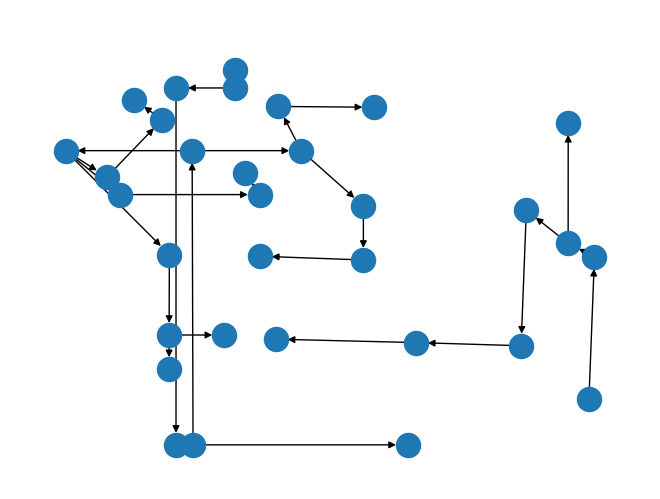

In [4]:
# get node dataset from data service
centerville_epn_link = '5b1fdc2db1cf3e336d7cecc9'
fromnode_fldname = 'fromnode'
tonode_fldname = 'tonode'
link_dataset = Dataset.from_data_service(centerville_epn_link, DataService(client)).get_inventory_reader()
link_filepath = os.path.join(link_dataset.path, link_dataset.name + ".shp")
# the actual graph function in pyincore to directly create graph from the dataset and use
# instead of reading it from the graph file
g, node_coords = NetworkUtil.create_network_graph_from_link(link_filepath, fromnode_fldname, tonode_fldname, is_directed=True)
print(node_coords)
print(g)
nx.draw(g, node_coords)

### Create Link shapefile from Node and Graph dataset

In [5]:
# this process can be done using the local shapefile, 
# instead of using the dataset from the incore data service.
# simply, provide the node_filename and graph_filename that are the file paths

# get node dataset from data service
centerville_epn_node = '5b1fdb50b1cf3e336d7cecb1'
node_dataset = Dataset.from_data_service(centerville_epn_node, DataService(client)).get_inventory_reader()
node_filename = os.path.join(node_dataset.path, node_dataset.name + ".shp")

# get graph dataset from data serivce
centerville_epn_network_graph = '6215681e45bb42602207cdb8'
graph_dataset = Dataset.from_data_service(centerville_epn_network_graph, DataService(client))
graph_filename = graph_dataset.get_file_path()

# create output link shapefile
id_field = 'nodenwid'
out_filename = 'network_links.shp'
NetworkUtil.build_link_by_node(node_filename, graph_filename, id_field, out_filename)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


/var/folders/lz/cytsgpz97f34yd69304b9vyc0000gr/T/ipykernel_12874/3196477836.py:18: FionaDeprecationWarning: This function will be removed in version 2.0. Please use CRS.from_epsg() instead.
  NetworkUtil.build_link_by_node(node_filename, graph_filename, id_field, out_filename)


True

### Create Node shapefile and Graph file from Link dataset

In [6]:
# this process can be done using the local shapefile, 
# instead of using the dataset from the incore data service.
# simply, provide the node_filename and graph_filename that are the file paths

# get link dataset from data service
centerville_epn_link = '5b1fdc2db1cf3e336d7cecc9'
link_dataset = Dataset.from_data_service(centerville_epn_link, DataService(client)).get_inventory_reader()
link_filename = os.path.join(link_dataset.path, link_dataset.name + ".shp")

# set input field names
link_id_field = 'linknwid'
fromnode_field = 'fromnode'
tonode_field = 'tonode'

# set output file names
out_node_filename = 'network_nodes.shp'
out_graph_filename = 'network_graph.csv'

# create output link shapefile and graph file
NetworkUtil.build_node_by_link(link_filename, link_id_field, fromnode_field, tonode_field, out_node_filename, out_graph_filename)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


/var/folders/lz/cytsgpz97f34yd69304b9vyc0000gr/T/ipykernel_12874/1565815967.py:20: FionaDeprecationWarning: This function will be removed in version 2.0. Please use CRS.from_epsg() instead.
  NetworkUtil.build_node_by_link(link_filename, link_id_field, fromnode_field, tonode_field, out_node_filename, out_graph_filename)


True

### Upload/Create Network Datasets to Data Services
This example shows how to create network dataset by uploading a link shapefile and a node shapefile

#### Prerequisite

- **meta data** is json text descrbing the network dataset component
- **node file** is a shapefile that contains node information of the network. 
- **link file** is a shapefile that contains the link information. This should include fromnode and tonode information.
- **graph file** is a csv file that contains the network relationship between the link and node.

In [7]:
dataset_prop = {
  "title": "Test epn network",
  "dataType": "incore:epnNetwork",
  "format": "shp-network",
  "networkDataset": {
    "link": {
      "dataType": "ergo:powerLineTopo",
      "fileName": "epn_links.shp"
    },
    "node": {
      "dataType": "incore:epf",
      "fileName": "epn_nodes.shp"
    },
    "graph": {
      "dataType": "incore:networkGraph",
      "fileName": "network_graph.csv"
    }
  }
}

response = datasvc.create_dataset(dataset_prop)

if 'id' not in response:
    print("Failed to create a dataset in the data service")
else:
    dataset_id = response['id']

    print('network dataset is created with id ' + dataset_id)
    print('attching files to created dataset')

    file_dir = os.path.join(os.getcwd(), 'files')

    files = ['epn_links.shp',
             'epn_links.dbf',
             'epn_links.shx',
             'epn_links.prj',
             'epn_nodes.shp',
             'epn_nodes.dbf',
             'epn_nodes.shx',
             'epn_nodes.prj',
             'network_graph.csv']
    linkname = dataset_prop["networkDataset"]["link"]["fileName"]
    nodename = dataset_prop["networkDataset"]["node"]["fileName"]
    graphname = dataset_prop["networkDataset"]["graph"]["fileName"]

    response = datasvc.add_files_to_network_dataset(dataset_id, files, nodename, linkname, graphname)
    dataset = Dataset.from_data_service(response["id"], data_service=datasvc)

network dataset is created with id 6536d02dfaa0854c4fb04416
attching files to created dataset
